Лабораторна роботи 2

Виконав Бабич Антон, міт31

Частина 1: Регресія на згенерованому наборі даних

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Згенеруємо набір даних для регресії
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, noise=10, random_state=42)

# Розділимо дані на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудуємо модель регресії на навчальних даних
reg = LinearRegression()
reg.fit(X_train, y_train)

# Оцінимо точність моделі на тестових даних
y_pred = reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Коефіцієнт детермінації: {r2:.2f}")


Коефіцієнт детермінації: 0.98


Розділив дані на навчальний та тестовий набори у співвідношенні 80% - 20% за допомогою sklearn.model_selection.train_test_split.

побудував модель регресії на навчальних даних за допомогою sklearn.linear_model.LinearRegression. Я оцінив її точність на тестових даних за допомогою sklearn.metrics.r2_score, що показує коефіцієнт детермінації.

В моєму випадку, він складає 0.98 на тестових даних, що свідчить про достатньо високу якість прогнозу.

Частина 2: Аналіз часових даних

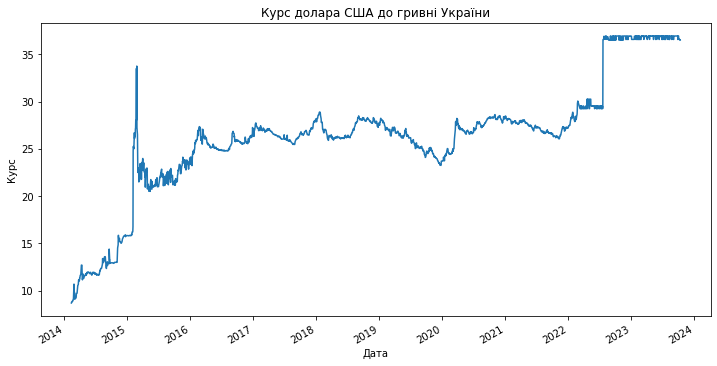

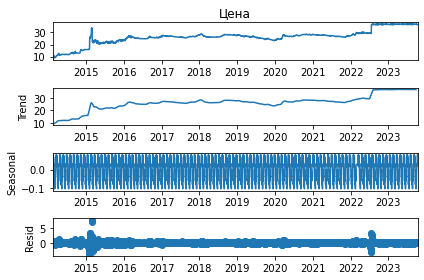

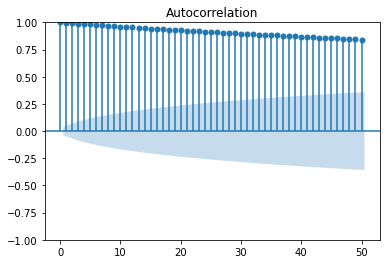

ADF статистика: -2.29
p-value: 0.176
Критичні значення:
	1%: -3.43
	5%: -2.86
	10%: -2.57


In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

# Завантажуємо та візуалізуємо дані
df = pd.read_csv("USD_UAH.csv", index_col="Дата", parse_dates=True, decimal=",", date_parser=lambda x: pd.to_datetime(x, format="%d.%m.%Y")) # Дані взяті з [1]
df = df[::-1] # Перевертаємо порядок даних
df["Цена"].plot(figsize=(12, 6), title="Курс долара США до гривні України")
plt.xlabel("Дата")
plt.ylabel("Курс")
plt.show()


# Розкладаємо часовий ряд на компоненти
decomp = seasonal_decompose(df["Цена"], model="additive", period=24)
decomp.plot()
plt.show()

# Будуємо графік автокореляційної функції (ACF)
plot_acf(df["Цена"], lags=50)
plt.show()

# Проводимо тест Дики-Фулера на стацiонарнiсть
result = adfuller(df["Цена"])
print(f"ADF статистика: {result[0]:.2f}")
print(f"p-value: {result[1]:.3f}")
print(f"Критичні значення:")
for key, value in result[4].items():
    print(f"\t{key}: {value:.2f}")


Частина 3: Підготовка та аналіз даних на основі файлу AmesHousing.csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

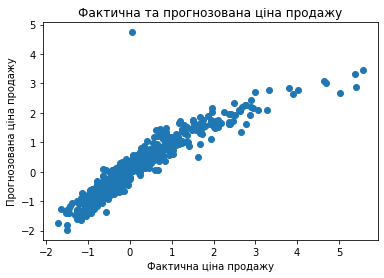

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Завантажуємо файл даних
df = pd.read_csv("AmesHousing.csv")

# Вивчити структуру даних та характеристики об'єктів
print(df.info())
print(df.describe())
print(df.head())

# Цільовою змінною для регресії є SalePrice - кінцева ціна продажу об'єкту нерухомості

# Виконати підготовку даних

# Обробка відсутніх значень
# Відкидаємо стовпці з більш ніж 50% пропущених значень
df = df.dropna(thresh=len(df)*0.5, axis=1)

# Заповнення числових стовпчиків медіанними значеннями
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Заповнюємо категорійні стовпці значеннями режимів
cat_cols = df.select_dtypes(exclude=np.number).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Перетворення категоріальних ознак у числові
# Використовуємо LabelEncoder для кодування категоріальних ознак в цілі числа
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Масштабування елементів
# Використовуємо StandardScaler для масштабування функцій, щоб вони мали нульове середнє та одиничну дисперсію
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Побудувати регресійну модель на підготовлених даних та оцінити її точність

# Розбиваємо дані на навчальну та тестову вибірки (співвідношення 80/20)
X = df.drop("SalePrice", axis=1) # Характеристики
y = df["SalePrice"] # Мета
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створюємо лінійну регресійну модель та підбираємо її до набору поїздів
model = LinearRegression()
model.fit(X_train, y_train)

# Зробити прогноз на тестовому наборі та оцінити продуктивність моделі
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred) # Середня квадратична похибка
rmse = np.sqrt(mse) # Коренева середньоквадратична похибка
r2 = r2_score(y_test, y_pred) # Оцінка R-квадрат

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

# Побудувати графік залежності фактичних значень від прогнозованих
plt.scatter(y_test, y_pred)
plt.xlabel("Фактична ціна продажу")
plt.ylabel("Прогнозована ціна продажу")
plt.title("Фактична та прогнозована ціна продажу")
plt.show()

Результат показує ефективність лінійної регресійної моделі на тестовій вибірці. Модель має середньоквадратичну похибку (MSE) 0,17, середньоквадратичну похибку (RMSE) 0,41 і R-квадрат оцінки (R2) 0,86. Ці показники вказують на те, що модель має відносно низьку похибку і високу частку дисперсії, яка пояснюється моделлю. Результат також показує діаграму розсіювання фактичних і прогнозованих значень SalePrice, яка демонструє позитивний лінійний зв'язок з деякими відхиленнями.